In [145]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from inspect import signature
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from matplotlib import pyplot
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

print("Setup Complete")

Setup Complete


In [154]:
df = pd.read_csv("TransportationData/datasetBalanced/dataset_5secondWindow.csv") #dataset_halfSecondWindows
#df.info
# first doing label encodingon User

# sorting based on the user label



# plotting given_user distribution


# making split

In [131]:
df

In [127]:
list_users=df.user.unique()
ax = df['user'].value_counts().plot(kind='bar')
ax.figure.savefig('user_distribution.png')
df['user'].value_counts()

1     2470
2      820
3      531
4      397
5      331
6      279
7      271
8      227
9      214
10     167
11      90
12      79
13      17
Name: user, dtype: int64

In [129]:
grouped = df.groupby(df.user)
user_dict = {}
sample_df = df[:0]
for i in range(1,10):
    user_dict[i] = grouped.get_group(i)
    user_dict[i] = user_dict[i].sample(n=200)
    sample_df = sample_df.append(user_dict[i])

In [130]:
sample_df

,id,time,activityrecognition#0,activityrecognition#1,android.sensor.accelerometer#mean,android.sensor.accelerometer#min,android.sensor.accelerometer#max,android.sensor.accelerometer#std,android.sensor.game_rotation_vector#mean,android.sensor.game_rotation_vector#min,...,sound#mean,sound#min,sound#max,sound#std,speed#mean,speed#min,speed#max,speed#std,target,user
3033,2557,270.0,NaN,100.0,9.459131,8.596292,9.958369,0.424460,0.828818,0.826528,...,89.808722,89.808722,89.808722,0.546632,22.750000,22.750000,22.750000,0.018236,1,1
5187,6888,203.0,NaN,100.0,9.454212,6.528467,15.270060,3.051598,0.918300,0.901942,...,89.745596,89.745596,89.745596,0.064286,1.000000,1.000000,1.000000,0.018236,5,1
801,4873,7.0,NaN,100.0,9.296401,7.063789,10.157200,0.769146,0.836993,0.835307,...,89.771014,89.771014,89.771014,0.806102,1.710000,1.700000,1.710000,0.018236,3,1
4715,574,106.0,NaN,100.0,9.534583,9.275476,9.776760,0.137718,0.691287,0.687846,...,89.738088,89.725208,89.750969,0.018215,1.710000,1.700000,1.710000,0.018236,4,1
3490,17,20.0,NaN,100.0,9.444945,8.259068,10.525910,0.643515,0.869815,0.864700,...,86.549222,86.549222,86.549222,0.806102,2.750000,2.750000,2.750000,0.018236,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
754,13292,371.0,NaN,100.0,10.185072,10.128379,10.228214,0.025315,0.840643,0.818037,...,62.696287,62.696287,62.696287,1.006611,0.000000,0.000000,0.000000,0.000000,1,9
1069,12953,32.0,NaN,100.0,9.562690,8.317307,10.653756,0.472810,0.840643,0.818037,...,84.775971,84.775971,84.775971,0.919714,11.804639,11.367126,12.512382,0.618604,1,9
4176,12964,43.0,NaN,100.0,9.669777,9.161045,10.157896,0.229905,0.840643,0.818037,...,72.062835,71.009459,73.116210,1.489698,12.360024,12.360024,12.360024,0.835660,1,9
3471,13532,611.0,NaN,100.0,9.691090,9.652261,9.735185,0.017007,0.840643,0.818037,...,49.307657,49.307657,49.307657,1.006611,0.000000,0.000000,0.000000,0.000000,1,9


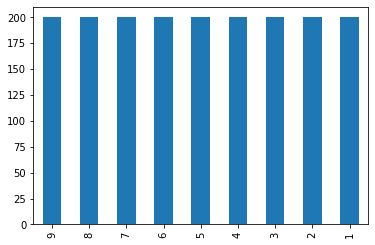

In [132]:
list_users=sample_df.user.unique()
ax = sample_df['user'].value_counts().plot(kind='bar')
ax.figure.savefig('user_distribution.png')

In [133]:
sample_df.isna().sum().sum()

1800

In [134]:
sample_df = sample_df.replace([' ','NULL'],np.nan)
sample_df = sample_df.dropna(thresh=sample_df.shape[0]*0.6,how='all',axis=1)

In [135]:
sample_df.isna().sum().sum()

0

In [137]:
df2 = sample_df
train_pct_index1 = int(0.2 * len(df2))
train_pct_index2 = int(0.4 * len(df2))
train_pct_index3 = int(0.6 * len(df2))
train_pct_index4 = int(0.8 * len(df2))
print(0,train_pct_index1,train_pct_index2,train_pct_index3,train_pct_index4,len(df2))
# first fold:
train1, test1 =  df2[train_pct_index1:], df2[:train_pct_index1]  # 20 to 100 
# 2 fold:
train2, test2 =  df2.head(train_pct_index2).append(df2.tail(train_pct_index2)), df2[train_pct_index1:train_pct_index2] # 40 to 100 + 0 to 20
train3, test3 =  df2.head(-train_pct_index3).append(df2.head(train_pct_index2)), df2[train_pct_index2:train_pct_index3] # 60 to 100 + 0 to 40
train4, test4 =  df2.head(-train_pct_index4).append(df2.head(train_pct_index3)), df2[train_pct_index3:train_pct_index4] # 80 to 100 + 0 to 60
train5, test5 =  df2[:train_pct_index4], df2[train_pct_index4:]  # 0 to 80


0 360 720 1080 1440 1800


In [138]:
# first fold: train1, test1
# train separate
train1 = train1.drop(['user'], axis=1)
train1 = train1.drop(['id'], axis =1)

# test separate
test1 = test1.fillna(test1.mean())
test1 =test1.drop(['user'], axis=1)
test1 = test1.drop(['id'], axis =1)
test1 = test1.dropna(axis=0)

y = train1.target
x = train1.loc[:, train1.columns != 'target']
y1 = test1.target
x1 = test1.loc[:, test1.columns != 'target']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
model=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("internal accuracy:", metrics.accuracy_score(y_test, y_pred))

y_pred=model.predict(x1)
fold1= metrics.accuracy_score(y1, y_pred)

print("Accuracy:",fold1)


internal accuracy: 0.9756944444444444
Accuracy: 0.5944444444444444


In [ ]:
# second fold: train2, test2

# train separate
train2 = train2.drop(['user'], axis=1)
train2 = train2.drop(['id'], axis =1)

# test separate
test2 = test2.drop(['user'], axis=1)
test2 = test2.drop(['id'], axis =1)
test2 = test2.dropna(axis=0)

y = train2.target
x = train2.loc[:, train2.columns != 'target']
y1 = test2.target
x1 = test2.loc[:, test2.columns != 'target']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
model=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("internal accuracy:", metrics.accuracy_score(y_test, y_pred))

y_pred=model.predict(x1)
fold2= metrics.accuracy_score(y1, y_pred)

print("Accuracy:",fold2)


In [ ]:
# second fold: train3, test3

# train separate
train3 = train3.drop(['user'], axis=1)
train3 = train3.drop(['id'], axis =1)

# test separate
test3 = test3.drop(['user'], axis=1)
test3 = test3.drop(['id'], axis =1)
test3 = test3.dropna(axis=0)

y = train3.target
x = train3.loc[:, train3.columns != 'target']
y1 = test3.target
x1 = test3.loc[:, test3.columns != 'target']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
model=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("internal accuracy:", metrics.accuracy_score(y_test, y_pred))

y_pred=model.predict(x1)
fold3= metrics.accuracy_score(y1, y_pred)

print("Accuracy:",fold3)


In [ ]:
# second fold: train4, test4

# train separate
train4 = train4.drop(['user'], axis=1)
train4 = train4.drop(['id'], axis =1)

# test separate
test4 = test4.drop(['user'], axis=1)
test4 = test4.drop(['id'], axis =1)
test4 = test4.dropna(axis=0)

y = train4.target
x = train4.loc[:, train4.columns != 'target']
y1 = test4.target
x1 = test4.loc[:, test4.columns != 'target']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
model=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("internal accuracy:", metrics.accuracy_score(y_test, y_pred))

y_pred=model.predict(x1)
fold4= metrics.accuracy_score(y1, y_pred)

print("Accuracy:",fold4)


In [ ]:
# second fold: train5, test5

# train separate
train5 = train5.drop(['user'], axis=1)
train5 = train5.drop(['id'], axis =1)

# test separate
test5 = test5.drop(['user'], axis=1)
test5 = test5.drop(['id'], axis =1)
test5 = test5.dropna(axis=0)

y = train5.target
x = train5.loc[:, train5.columns != 'target']
y1 = test5.target
x1 = test5.loc[:, test5.columns != 'target']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
model=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("internal accuracy:", metrics.accuracy_score(y_test, y_pred))

y_pred=model.predict(x1)
fold5= metrics.accuracy_score(y1, y_pred)

print("Accuracy:",fold5)


In [144]:
print("average fold:", (fold1+fold2+fold3+fold4+fold5)/5)

average fold: 0.7172222222222222


In [ ]:
# 

complete dataframe

In [183]:
df = pd.read_csv("TransportationData/datasetBalanced/dataset_5secondWindow.csv") #dataset_halfSecondWindows

In [184]:
df.isna().sum().sum()  #5893 * 70 

109609

In [185]:
df = df.replace([' ','NULL'],np.nan)
df = df.dropna(thresh=df.shape[0]*0.6,how='all',axis=1)

In [186]:
df.isna().sum().sum()  #5893 * 52 

32752

In [187]:
# commmon
#df = df.dropna(axis=1, how='all')
cleanup_target = {"target": {"Car":1,"Still":2,"Train":3,"Bus":4,"Walking":5}}
df = df.replace(cleanup_target)

cleanup_nums = {"user": {"andrea": 1, "Luca": 2, "Damiano": 3,"michelangelo": 4,
                         "Pierpaolo": 5, "Vincenzo": 6,"IvanHeibi":7,"AndreaCarpineti":8,
                         "Federica":9,"Serena":10,"Claudio":11,"Elena":12,
                         "Riccardo":13}}
df = df.replace(cleanup_nums)
#df = df.fillna(0)
#df = df.fillna(df.median())
df1 = df.sort_values(by=['user'])   
#print(df1)
df2 = df1
train_pct_index1 = int(0.2 * len(df2))
train_pct_index2 = int(0.4 * len(df2))
train_pct_index3 = int(0.6 * len(df2))
train_pct_index4 = int(0.8 * len(df2))
print(0,train_pct_index1,train_pct_index2,train_pct_index3,train_pct_index4,len(df2))
# first fold:
train1, test1 =  df2[train_pct_index1:], df2[:train_pct_index1]  # 20 to 100 
# 2 fold:
train2, test2 =  df2.head(train_pct_index2).append(df2.tail(train_pct_index2)), df2[train_pct_index1:train_pct_index2] # 40 to 100 + 0 to 20
train3, test3 =  df2.head(-train_pct_index3).append(df2.head(train_pct_index2)), df2[train_pct_index2:train_pct_index3] # 60 to 100 + 0 to 40
train4, test4 =  df2.head(-train_pct_index4).append(df2.head(train_pct_index3)), df2[train_pct_index3:train_pct_index4] # 80 to 100 + 0 to 60
train5, test5 =  df2[:train_pct_index4], df2[train_pct_index4:]  # 0 to 80


0 1178 2357 3535 4714 5893


In [179]:
df1 = df1.dropna(axis=0)

df3= df1.loc[df1['user'] == 3]
df4= df1.loc[df1['user'] == 4]
df3 = df3.drop(['user'], axis=1)
df3 = df3.drop(['id'], axis =1)
df4 = df4.drop(['user'], axis=1)
df4 = df4.drop(['id'], axis =1)
df3.to_csv("userdata_3.csv")
df4.to_csv("userdata_4.csv")

In [59]:
test3.isna().sum().sum()

0

In [60]:
df2

,id,time,activityrecognition#1,android.sensor.accelerometer#mean,android.sensor.accelerometer#min,android.sensor.accelerometer#max,android.sensor.accelerometer#std,android.sensor.game_rotation_vector#mean,android.sensor.game_rotation_vector#min,android.sensor.game_rotation_vector#max,...,android.sensor.rotation_vector#mean,android.sensor.rotation_vector#min,android.sensor.rotation_vector#max,android.sensor.rotation_vector#std,sound#mean,sound#min,sound#max,sound#std,target,user
2946,5228,190.0,92.0,10.179832,10.137434,10.207683,0.020380,0.995086,0.995067,0.995112,...,0.993701,0.993684,0.993730,0.000018,84.350732,84.350732,84.350732,0.923820,3,1
3075,5835,193.0,35.0,10.179362,9.853068,10.587065,0.167584,0.987558,0.987359,0.987745,...,0.987833,0.987665,0.988087,0.000132,89.762268,89.762268,89.762268,0.001198,3,1
3076,2274,256.0,8.0,9.657759,9.029124,10.286443,0.414025,0.844973,0.840452,0.851091,...,0.967217,0.966331,0.968526,0.000898,89.769040,89.769040,89.769040,0.013131,1,1
3077,7287,86.0,100.0,10.299321,8.088142,12.456252,1.604990,0.968824,0.956427,0.975352,...,0.969553,0.946158,0.985092,0.012159,88.572737,88.572737,88.572737,0.095157,5,1
3079,184,91.0,85.0,9.729062,7.139446,14.355289,2.184604,0.928255,0.925184,0.931989,...,0.996661,0.995873,0.997817,0.000880,89.773691,89.767912,89.779470,0.008173,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5063,20310,25.0,100.0,10.637163,2.471217,28.961093,5.469623,0.814607,0.814607,0.814607,...,0.864858,0.864858,0.864858,0.093590,84.941781,84.941781,84.941781,0.945771,5,13
1296,20330,45.0,100.0,11.333011,3.124888,35.098704,5.852742,0.763646,0.763646,0.763646,...,0.734003,0.702986,0.777730,0.038959,82.625956,82.625956,82.625956,5.321307,5,13
1619,20292,7.0,100.0,10.592901,4.633172,16.071722,2.962479,0.710383,0.647101,0.761554,...,0.660923,0.660923,0.660923,0.029389,84.591077,84.591077,84.591077,0.806102,5,13
2314,20299,14.0,100.0,11.132643,7.024562,18.064503,2.831729,0.923661,0.910555,0.943459,...,0.954242,0.954242,0.954242,0.004344,76.260939,76.260939,76.260939,0.806102,5,13


In [188]:
# first fold: train1, test1
# train separate
# train1 = train1.dropna(axis = 1, how='all')
#train1 = train1.fillna(train1.mean())

#df2 = train1
train1 = train1.drop(['user'], axis=1)
train1 = train1.drop(['id'], axis =1)

# test separate
test1 = test1.dropna(axis=1, how='all')
#test1 = test1.fillna(test1.mean())
#df2 = df1
test1 =test1.drop(['user'], axis=1)
test1 = test1.drop(['id'], axis =1)
test1 = test1.dropna(axis=0)

y = train1.target
x = train1.loc[:, train1.columns != 'target']
y1 = test1.target
x1 = test1.loc[:, test1.columns != 'target']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
model=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("internal accuracy:", metrics.accuracy_score(y_test, y_pred))

y_pred=model.predict(x1)
fold1= metrics.accuracy_score(y1, y_pred)

print("Accuracy:",fold1)


ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [139]:
# second fold: train2, test2

# train separate
train2 = train2.drop(['user'], axis=1)
train2 = train2.drop(['id'], axis =1)

# test separate
test2 = test2.drop(['user'], axis=1)
test2 = test2.drop(['id'], axis =1)
test2 = test2.dropna(axis=0)

y = train2.target
x = train2.loc[:, train2.columns != 'target']
y1 = test2.target
x1 = test2.loc[:, test2.columns != 'target']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
model=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("internal accuracy:", metrics.accuracy_score(y_test, y_pred))

y_pred=model.predict(x1)
fold2= metrics.accuracy_score(y1, y_pred)

print("Accuracy:",fold2)


internal accuracy: 0.9513888888888888
Accuracy: 0.9916666666666667


In [140]:
# second fold: train3, test3

# train separate
train3 = train3.drop(['user'], axis=1)
train3 = train3.drop(['id'], axis =1)

# test separate
test3 = test3.drop(['user'], axis=1)
test3 = test3.drop(['id'], axis =1)
test3 = test3.dropna(axis=0)

y = train3.target
x = train3.loc[:, train3.columns != 'target']
y1 = test3.target
x1 = test3.loc[:, test3.columns != 'target']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
model=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("internal accuracy:", metrics.accuracy_score(y_test, y_pred))

y_pred=model.predict(x1)
fold3= metrics.accuracy_score(y1, y_pred)

print("Accuracy:",fold3)


internal accuracy: 0.9861111111111112
Accuracy: 0.5694444444444444


In [141]:
# second fold: train4, test4

# train separate
train4 = train4.drop(['user'], axis=1)
train4 = train4.drop(['id'], axis =1)

# test separate
test4 = test4.drop(['user'], axis=1)
test4 = test4.drop(['id'], axis =1)
test4 = test4.dropna(axis=0)

y = train4.target
x = train4.loc[:, train4.columns != 'target']
y1 = test4.target
x1 = test4.loc[:, test4.columns != 'target']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
model=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("internal accuracy:", metrics.accuracy_score(y_test, y_pred))

y_pred=model.predict(x1)
fold4= metrics.accuracy_score(y1, y_pred)

print("Accuracy:",fold4)


internal accuracy: 0.9791666666666666
Accuracy: 0.7638888888888888


In [142]:
# second fold: train5, test5

# train separate
train5 = train5.drop(['user'], axis=1)
train5 = train5.drop(['id'], axis =1)

# test separate
test5 = test5.drop(['user'], axis=1)
test5 = test5.drop(['id'], axis =1)
test5 = test5.dropna(axis=0)

y = train5.target
x = train5.loc[:, train5.columns != 'target']
y1 = test5.target
x1 = test5.loc[:, test5.columns != 'target']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
model=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("internal accuracy:", metrics.accuracy_score(y_test, y_pred))

y_pred=model.predict(x1)
fold5= metrics.accuracy_score(y1, y_pred)

print("Accuracy:",fold5)


internal accuracy: 0.9375
Accuracy: 0.6666666666666666


In [143]:
print("average fold:", (fold1+fold2+fold3+fold4+fold5)/5)

average fold: 0.7172222222222222


In [ ]:
# sorting the df by column
df1 

In [ ]:
# de
df2 = df1

df2 = df2.drop(['user'], axis=1)
df2 = df2.drop(['id'],axis =1)

In [185]:
#df.apply(preprocessing.LabelEncoder().fit_transform(df['user']))

In [186]:
user_df = df['user'].value_counts()
user_df

andrea             2470
Luca                820
Damiano             531
michelangelo        397
Pierpaolo           331
Vincenzo            279
IvanHeibi           271
AndreaCarpineti     227
Federica            214
Serena              167
Claudio              90
Elena                79
Riccardo             17
Name: user, dtype: int64

In [187]:
df['target'].value_counts()

Car        1180
Still      1179
Train      1179
Bus        1178
Walking    1177
Name: target, dtype: int64

In [188]:
cleanup_target = {"target": {"Car":1,"Still":2,"Train":3,"Bus":4,"Walking":5}}
df = df.replace(cleanup_target)
df

,id,time,activityrecognition#0,activityrecognition#1,android.sensor.accelerometer#mean,android.sensor.accelerometer#min,android.sensor.accelerometer#max,android.sensor.accelerometer#std,android.sensor.game_rotation_vector#mean,android.sensor.game_rotation_vector#min,...,sound#mean,sound#min,sound#max,sound#std,speed#mean,speed#min,speed#max,speed#std,target,user
0,16170,78.0,NaN,100.0,9.811476,9.758895,9.849411,0.014626,0.029340,0.029014,...,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,2,Luca
1,15871,145.0,NaN,100.0,9.939207,7.707437,17.146631,1.775944,0.999925,0.999903,...,89.200210,89.065143,89.335277,0.191013,16.539349,16.539349,16.539349,0.628595,1,Luca
2,16811,150.0,NaN,100.0,9.827178,9.804817,9.849262,0.011199,0.665215,0.665213,...,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,2,Luca
3,15831,105.0,NaN,77.0,9.673039,7.659674,12.304298,0.862553,0.996221,0.993781,...,87.470377,87.470377,87.470377,2.284186,17.739895,17.739895,17.739895,0.628595,1,Luca
4,876,77.0,NaN,100.0,9.993466,8.965621,10.891645,0.504117,0.563792,0.521799,...,89.770732,89.770732,89.770732,0.006389,9.000000,9.000000,9.000000,NaN,1,andrea
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5888,14125,4.0,NaN,100.0,10.066610,4.564648,13.414389,3.373972,0.986319,0.974523,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,IvanHeibi
5889,19582,32.0,NaN,10.0,9.964271,8.768007,11.454213,0.665529,0.648602,0.648343,...,NaN,NaN,NaN,NaN,31.960054,31.960054,31.960054,NaN,3,Pierpaolo
5890,16178,86.0,NaN,100.0,9.812893,9.772881,9.862587,0.017633,0.024392,0.024081,...,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,2,Luca
5891,10973,199.0,NaN,100.0,9.831144,9.807347,9.874450,0.013485,0.481212,0.481209,...,NaN,NaN,NaN,NaN,1.090415,1.090415,1.090415,NaN,2,Damiano


In [189]:
cleanup_nums = {"user": {"andrea": 1, "Luca": 2, "Damiano": 3,"michelangelo": 4,
                         "Pierpaolo": 5, "Vincenzo": 6,"IvanHeibi":7,"AndreaCarpineti":8,
                         "Federica":9,"Serena":10,"Claudio":11,"Elena":12,
                         "Riccardo":13}}

df = df.replace(cleanup_nums)
df

,id,time,activityrecognition#0,activityrecognition#1,android.sensor.accelerometer#mean,android.sensor.accelerometer#min,android.sensor.accelerometer#max,android.sensor.accelerometer#std,android.sensor.game_rotation_vector#mean,android.sensor.game_rotation_vector#min,...,sound#mean,sound#min,sound#max,sound#std,speed#mean,speed#min,speed#max,speed#std,target,user
0,16170,78.0,NaN,100.0,9.811476,9.758895,9.849411,0.014626,0.029340,0.029014,...,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,2,2
1,15871,145.0,NaN,100.0,9.939207,7.707437,17.146631,1.775944,0.999925,0.999903,...,89.200210,89.065143,89.335277,0.191013,16.539349,16.539349,16.539349,0.628595,1,2
2,16811,150.0,NaN,100.0,9.827178,9.804817,9.849262,0.011199,0.665215,0.665213,...,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,2,2
3,15831,105.0,NaN,77.0,9.673039,7.659674,12.304298,0.862553,0.996221,0.993781,...,87.470377,87.470377,87.470377,2.284186,17.739895,17.739895,17.739895,0.628595,1,2
4,876,77.0,NaN,100.0,9.993466,8.965621,10.891645,0.504117,0.563792,0.521799,...,89.770732,89.770732,89.770732,0.006389,9.000000,9.000000,9.000000,NaN,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5888,14125,4.0,NaN,100.0,10.066610,4.564648,13.414389,3.373972,0.986319,0.974523,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,7
5889,19582,32.0,NaN,10.0,9.964271,8.768007,11.454213,0.665529,0.648602,0.648343,...,NaN,NaN,NaN,NaN,31.960054,31.960054,31.960054,NaN,3,5
5890,16178,86.0,NaN,100.0,9.812893,9.772881,9.862587,0.017633,0.024392,0.024081,...,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,2,2
5891,10973,199.0,NaN,100.0,9.831144,9.807347,9.874450,0.013485,0.481212,0.481209,...,NaN,NaN,NaN,NaN,1.090415,1.090415,1.090415,NaN,2,3


In [190]:
# sorting the df by column
df1 = df.sort_values(by=['user'])
df1 = df1.dropna(axis=1, how='all')
df1 = df1.fillna(df.mean())
df1

,id,time,activityrecognition#1,android.sensor.accelerometer#mean,android.sensor.accelerometer#min,android.sensor.accelerometer#max,android.sensor.accelerometer#std,android.sensor.game_rotation_vector#mean,android.sensor.game_rotation_vector#min,android.sensor.game_rotation_vector#max,...,sound#mean,sound#min,sound#max,sound#std,speed#mean,speed#min,speed#max,speed#std,target,user
2946,5228,190.0,92.0,10.179832,10.137434,10.207683,0.020380,0.995086,0.995067,0.995112,...,84.350732,84.350732,84.350732,0.923820,8.235254,8.216747,8.253528,0.236959,3,1
3075,5835,193.0,35.0,10.179362,9.853068,10.587065,0.167584,0.987558,0.987359,0.987745,...,89.762268,89.762268,89.762268,0.001198,8.235254,8.216747,8.253528,0.236959,3,1
3076,2274,256.0,8.0,9.657759,9.029124,10.286443,0.414025,0.844973,0.840452,0.851091,...,89.769040,89.769040,89.769040,0.013131,30.750000,30.750000,30.750000,0.236959,1,1
3077,7287,86.0,100.0,10.299321,8.088142,12.456252,1.604990,0.968824,0.956427,0.975352,...,88.572737,88.572737,88.572737,0.095157,0.750000,0.750000,0.750000,0.236959,5,1
3079,184,91.0,85.0,9.729062,7.139446,14.355289,2.184604,0.928255,0.925184,0.931989,...,89.773691,89.767912,89.779470,0.008173,11.000000,11.000000,11.000000,0.236959,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5063,20310,25.0,100.0,10.637163,2.471217,28.961093,5.469623,0.814607,0.814607,0.814607,...,84.941781,84.941781,84.941781,0.945771,1.463377,1.463377,1.463377,0.010040,5,13
1296,20330,45.0,100.0,11.333011,3.124888,35.098704,5.852742,0.763646,0.763646,0.763646,...,82.625956,82.625956,82.625956,5.321307,0.891086,0.883836,0.898335,0.010252,5,13
1619,20292,7.0,100.0,10.592901,4.633172,16.071722,2.962479,0.710383,0.647101,0.761554,...,84.591077,84.591077,84.591077,1.913065,1.402243,1.402243,1.402243,0.236959,5,13
2314,20299,14.0,100.0,11.132643,7.024562,18.064503,2.831729,0.923661,0.910555,0.943459,...,76.260939,76.260939,76.260939,1.913065,1.213918,1.213918,1.213918,0.236959,5,13


In [193]:
## splitting for test 
df1.isna().any().sum()


0

In [195]:
#df1

In [196]:
df2 = df1


In [140]:
df3

,id,time,activityrecognition#1,android.sensor.accelerometer#mean,android.sensor.accelerometer#min,android.sensor.accelerometer#max,android.sensor.accelerometer#std,android.sensor.game_rotation_vector#mean,android.sensor.game_rotation_vector#min,android.sensor.game_rotation_vector#max,...,android.sensor.step_counter#std,sound#mean,sound#min,sound#max,sound#std,speed#mean,speed#min,speed#max,speed#std,target
2946,5228,190.0,92.0,10.179832,10.137434,10.207683,0.020380,0.995086,0.995067,0.995112,...,2.959475,84.350732,84.350732,84.350732,0.923820,8.235254,8.216747,8.253528,0.236959,3
3075,5835,193.0,35.0,10.179362,9.853068,10.587065,0.167584,0.987558,0.987359,0.987745,...,2.959475,89.762268,89.762268,89.762268,0.001198,8.235254,8.216747,8.253528,0.236959,3
3076,2274,256.0,8.0,9.657759,9.029124,10.286443,0.414025,0.844973,0.840452,0.851091,...,2.959475,89.769040,89.769040,89.769040,0.013131,30.750000,30.750000,30.750000,0.236959,1
3077,7287,86.0,100.0,10.299321,8.088142,12.456252,1.604990,0.968824,0.956427,0.975352,...,2.959475,88.572737,88.572737,88.572737,0.095157,0.750000,0.750000,0.750000,0.236959,5
3079,184,91.0,85.0,9.729062,7.139446,14.355289,2.184604,0.928255,0.925184,0.931989,...,2.959475,89.773691,89.767912,89.779470,0.008173,11.000000,11.000000,11.000000,0.236959,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5063,20310,25.0,100.0,10.637163,2.471217,28.961093,5.469623,0.814607,0.814607,0.814607,...,2.959475,84.941781,84.941781,84.941781,0.945771,1.463377,1.463377,1.463377,0.010040,5
1296,20330,45.0,100.0,11.333011,3.124888,35.098704,5.852742,0.763646,0.763646,0.763646,...,2.959475,82.625956,82.625956,82.625956,5.321307,0.891086,0.883836,0.898335,0.010252,5
1619,20292,7.0,100.0,10.592901,4.633172,16.071722,2.962479,0.710383,0.647101,0.761554,...,2.959475,84.591077,84.591077,84.591077,1.913065,1.402243,1.402243,1.402243,0.236959,5
2314,20299,14.0,100.0,11.132643,7.024562,18.064503,2.831729,0.923661,0.910555,0.943459,...,2.959475,76.260939,76.260939,76.260939,1.913065,1.213918,1.213918,1.213918,0.236959,5


In [212]:
#train=df2.sample(frac=0.8,random_state=1) #random state is a seed value #sample
#test=df2.drop(train.index)
df2 = df1

df2 = df2.drop(['user'], axis=1)
df2 = df2.drop(['id'],axis =1)

train_pct_index = int(0.8 * len(df2))
print(train_pct_index)
train, test = df2[:train_pct_index], df2[train_pct_index:]
print(train.shape, test.shape)

4714
(4714, 67) (1179, 67)


In [217]:
train_pct_index1 = int(0.2 * len(df2))
train_pct_index2 = int(0.4 * len(df2))
train_pct_index3 = int(0.6 * len(df2))
train_pct_index4 = int(0.8 * len(df2))
print(0,train_pct_index1,train_pct_index2,train_pct_index3,train_pct_index4,len(df2))
# first fold:
train1, test1 =  df2[train_pct_index1:], df2[:train_pct_index1]  # 20 to 100 
# 2 fold:
train2, test2 =  df2.head(train_pct_index2).append(df2.tail(train_pct_index2)), df2[train_pct_index1:train_pct_index2] # 40 to 100 + 0 to 20
train3, test3 =  df2.head(-train_pct_index3).append(df2.head(train_pct_index2)), df2[train_pct_index2:train_pct_index3] # 60 to 100 + 0 to 40
train4, test4 =  df2.head(-train_pct_index4).append(df2.head(train_pct_index3)), df2[train_pct_index3:train_pct_index4] # 80 to 100 + 0 to 60
train5, test5 =  df2[:train_pct_index4], df2[train_pct_index4:]  # 0 to 80

#print(train1.shape, test1.shape)
#print(train2.shape, test2.shape)
#print(train3.shape, test3.shape)
#print(train4.shape, test4.shape)
#print(train5.shape, test5.shape)

0 1178 2357 3535 4714 5893


In [218]:
train1

,time,activityrecognition#1,android.sensor.accelerometer#mean,android.sensor.accelerometer#min,android.sensor.accelerometer#max,android.sensor.accelerometer#std,android.sensor.game_rotation_vector#mean,android.sensor.game_rotation_vector#min,android.sensor.game_rotation_vector#max,android.sensor.game_rotation_vector#std,...,android.sensor.step_counter#std,sound#mean,sound#min,sound#max,sound#std,speed#mean,speed#min,speed#max,speed#std,target
5816,335.0,100.0,9.803904,9.041084,10.600768,0.431985,0.873268,0.871488,0.875915,0.002022,...,2.959475,78.724855,78.451658,78.997213,1.913065,33.750000,33.750000,33.750000,0.176777,1
5818,22.0,15.0,10.241418,6.989096,12.978298,1.767100,0.972654,0.968368,0.976999,0.003377,...,2.959475,89.832276,89.832276,89.832276,1.913065,6.750000,6.750000,6.750000,0.236959,4
5821,51.0,8.0,10.076981,8.747623,11.593766,0.885338,0.929399,0.927497,0.932436,0.002278,...,2.959475,89.782006,89.782006,89.782006,0.019147,10.250000,10.250000,10.250000,0.236959,4
5825,99.0,85.0,9.674227,8.714782,10.585830,0.656325,0.737124,0.729523,0.741717,0.003475,...,2.959475,89.782569,89.782569,89.782569,0.003391,20.000000,20.000000,20.000000,0.236959,1
4848,25.0,69.0,10.171165,10.037080,10.269502,0.072740,0.993360,0.993266,0.993420,0.000051,...,2.959475,89.753228,89.748990,89.759444,0.005501,8.235254,8.216747,8.253528,0.236959,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5063,25.0,100.0,10.637163,2.471217,28.961093,5.469623,0.814607,0.814607,0.814607,0.017443,...,2.959475,84.941781,84.941781,84.941781,0.945771,1.463377,1.463377,1.463377,0.010040,5
1296,45.0,100.0,11.333011,3.124888,35.098704,5.852742,0.763646,0.763646,0.763646,0.011899,...,2.959475,82.625956,82.625956,82.625956,5.321307,0.891086,0.883836,0.898335,0.010252,5
1619,7.0,100.0,10.592901,4.633172,16.071722,2.962479,0.710383,0.647101,0.761554,0.058179,...,2.959475,84.591077,84.591077,84.591077,1.913065,1.402243,1.402243,1.402243,0.236959,5
2314,14.0,100.0,11.132643,7.024562,18.064503,2.831729,0.923661,0.910555,0.943459,0.017443,...,2.959475,76.260939,76.260939,76.260939,1.913065,1.213918,1.213918,1.213918,0.236959,5


In [240]:
y = train1.target
x = train1.loc[:, train.columns != 'target']
y1 = test1.target
x1 = test1.loc[:, test.columns != 'target']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
model=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("internal accuracy:", metrics.accuracy_score(y_test, y_pred))

y_pred=model.predict(x1)
fold1= metrics.accuracy_score(y1, y_pred)

print("Accuracy:",fold1)

internal accuracy: 0.9840933191940615
Accuracy: 0.9813242784380306


In [235]:
y = train2.target
x = train2.loc[:, train.columns != 'target']
y1 = test2.target
x1 = test2.loc[:, test.columns != 'target']


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
model=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("internal accuracy:", metrics.accuracy_score(y_test, y_pred))

y_pred=model.predict(x1)
fold2= metrics.accuracy_score(y1, y_pred)
print("Accuracy:",fold2)

internal accuracy: 0.9840933191940615
Accuracy: 0.9957591178965225


In [236]:
y = train3.target
x = train3.loc[:, train.columns != 'target']
y1 = test3.target
x1 = test3.loc[:, test.columns != 'target']


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
model=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("internal accuracy:", metrics.accuracy_score(y_test, y_pred))

y_pred=model.predict(x1)
fold3= metrics.accuracy_score(y1, y_pred)
print("Accuracy:",fold3)

internal accuracy: 0.9978791092258749
Accuracy: 0.4473684210526316


In [237]:
y = train4.target
x = train4.loc[:, train.columns != 'target']
y1 = test4.target
x1 = test4.loc[:, test.columns != 'target']


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
model=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("internal accuracy:", metrics.accuracy_score(y_test, y_pred))

y_pred=model.predict(x1)
fold4= metrics.accuracy_score(y1, y_pred)
print("Accuracy:",fold4)

internal accuracy: 0.9862142099681867
Accuracy: 0.49957591178965227


In [233]:
y = train5.target
x = train5.loc[:, train.columns != 'target']
y1 = test5.target
x1 = test5.loc[:, test.columns != 'target']


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
model=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("internal accuracy:", metrics.accuracy_score(y_test, y_pred))

y_pred=model.predict(x1)
fold5= metrics.accuracy_score(y1, y_pred)
print("Accuracy:",fold5)

internal accuracy: 0.9830328738069989
Accuracy: 0.5979643765903307


In [238]:
print("mean_fold:",(fold1+fold2+fold3+fold4+fold5)/5)

mean_fold: 0.7037193040057256


In [102]:
# stratified kfold insignificant --> 0.992

Accuracy: 0.992 (0.005)


Feature: 0, Score: 0.01886
Feature: 1, Score: 0.01023
Feature: 2, Score: 0.01171
Feature: 3, Score: 0.02018
Feature: 4, Score: 0.01523
Feature: 5, Score: 0.04524
Feature: 6, Score: 0.00991
Feature: 7, Score: 0.00977
Feature: 8, Score: 0.01002
Feature: 9, Score: 0.01575
Feature: 10, Score: 0.00849
Feature: 11, Score: 0.00781
Feature: 12, Score: 0.00831
Feature: 13, Score: 0.00479
Feature: 14, Score: 0.02756
Feature: 15, Score: 0.01571
Feature: 16, Score: 0.02094
Feature: 17, Score: 0.02345
Feature: 18, Score: 0.03115
Feature: 19, Score: 0.01167
Feature: 20, Score: 0.01723
Feature: 21, Score: 0.01273
Feature: 22, Score: 0.02040
Feature: 23, Score: 0.02303
Feature: 24, Score: 0.02634
Feature: 25, Score: 0.00563
Feature: 26, Score: 0.04768
Feature: 27, Score: 0.01836
Feature: 28, Score: 0.03366
Feature: 29, Score: 0.01490
Feature: 30, Score: 0.02519
Feature: 31, Score: 0.02150
Feature: 32, Score: 0.03165
Feature: 33, Score: 0.01164
Feature: 34, Score: 0.01678
Feature: 35, Score: 0.01821
Fe

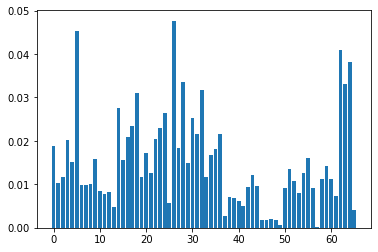

Accuracy: 0.9865724381625441


In [221]:
#pred = model.predict(x1)
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)
# get importance
importance = clf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
plt.savefig('feature_distribution.png')
pyplot.show()

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


In [222]:
# evaluate a logistic regression model using k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

model = RandomForestClassifier(n_estimators=100)
model1 = LogisticRegression()

# evaluate the model
cv = KFold(n_splits=10, random_state=1, shuffle=True)
n_scores = cross_val_score(model, x, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.987 (0.003)


In [223]:
print(type(X_test),X_test.shape)
print(type(x1),x1.shape)
y_pred=clf.predict(x1)
print("Accuracy:",metrics.accuracy_score(y1, y_pred))

<class 'pandas.core.frame.DataFrame'> (1415, 66)
<class 'pandas.core.frame.DataFrame'> (1179, 66)
Accuracy: 0.6564885496183206


In [254]:
'''
a = x1[:1]
#print(type(a))
y_pred=clf.predict(a)
print(y_pred)
a.to_csv("input1.csv")
a = x1.iloc[[2]] # df.iloc[[0]]
y_pred=clf.predict(a)
print(y_pred)
a.to_csv("input2.csv")
a = x1.iloc[[4]]
y_pred=clf.predict(a)
print(y_pred)
a.to_csv("input3.csv")
a = x1.iloc[[5]]
y_pred=clf.predict(a)
print(y_pred)
a.to_csv("input4.csv")
a = x1.iloc[[7]]
y_pred=clf.predict(a)
print(y_pred)
a.to_csv("input5.csv")
'''


[3]
[1]
[4]
[2]
[5]


In [178]:
print("F1:", f1_score(y1, y_pred, average='macro'))

F1: 0.5572249730161619


In [92]:
train

,id,time,activityrecognition#1,android.sensor.accelerometer#mean,android.sensor.accelerometer#min,android.sensor.accelerometer#max,android.sensor.accelerometer#std,android.sensor.game_rotation_vector#mean,android.sensor.game_rotation_vector#min,android.sensor.game_rotation_vector#max,...,sound#mean,sound#min,sound#max,sound#std,speed#mean,speed#min,speed#max,speed#std,target,user
2946,5228,190.0,92.0,10.179832,10.137434,10.207683,0.020380,0.995086,0.995067,0.995112,...,84.350732,84.350732,84.350732,0.923820,8.235254,8.216747,8.253528,0.236959,3,1
3075,5835,193.0,35.0,10.179362,9.853068,10.587065,0.167584,0.987558,0.987359,0.987745,...,89.762268,89.762268,89.762268,0.001198,8.235254,8.216747,8.253528,0.236959,3,1
3076,2274,256.0,8.0,9.657759,9.029124,10.286443,0.414025,0.844973,0.840452,0.851091,...,89.769040,89.769040,89.769040,0.013131,30.750000,30.750000,30.750000,0.236959,1,1
3077,7287,86.0,100.0,10.299321,8.088142,12.456252,1.604990,0.968824,0.956427,0.975352,...,88.572737,88.572737,88.572737,0.095157,0.750000,0.750000,0.750000,0.236959,5,1
3079,184,91.0,85.0,9.729062,7.139446,14.355289,2.184604,0.928255,0.925184,0.931989,...,89.773691,89.767912,89.779470,0.008173,11.000000,11.000000,11.000000,0.236959,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5223,21190,72.0,46.0,9.813829,8.480456,11.045430,0.420721,0.759280,0.743872,0.771629,...,70.725101,66.415385,75.034817,6.094859,3.500000,3.500000,3.500000,0.883883,4,6
1303,21588,28.0,100.0,9.594941,9.313803,9.864101,0.071488,0.759280,0.743872,0.771629,...,39.369659,39.369659,39.369659,1.913065,8.235254,8.216747,8.253528,0.236959,2,6
5527,21969,11.0,100.0,10.152073,5.343652,17.018795,2.925637,0.759280,0.743872,0.771629,...,72.157675,72.157675,72.157675,1.913065,0.750000,0.750000,0.750000,0.236959,5,6
2201,21349,54.0,100.0,10.062139,8.815584,11.753848,0.495030,0.759280,0.743872,0.771629,...,73.302235,73.302235,73.302235,1.999672,4.750000,4.750000,4.750000,0.236959,1,6


In [93]:
test

,id,time,activityrecognition#1,android.sensor.accelerometer#mean,android.sensor.accelerometer#min,android.sensor.accelerometer#max,android.sensor.accelerometer#std,android.sensor.game_rotation_vector#mean,android.sensor.game_rotation_vector#min,android.sensor.game_rotation_vector#max,...,sound#mean,sound#min,sound#max,sound#std,speed#mean,speed#min,speed#max,speed#std,target,user
3405,22014,32.0,100.0,10.016017,6.695976,17.216023,2.291921,0.759280,0.743872,0.771629,...,77.430291,77.430291,77.430291,6.594260,2.358495,2.358495,2.358495,0.000000,5,6
5109,21477,12.0,100.0,10.076863,9.980503,10.172089,0.043253,0.759280,0.743872,0.771629,...,38.061800,38.061800,38.061800,1.038442,8.235254,8.216747,8.253528,0.236959,2,6
1061,21155,37.0,46.0,10.097191,8.677063,12.176887,0.579607,0.759280,0.743872,0.771629,...,74.703991,74.703991,74.703991,5.538316,3.250000,3.000000,3.500000,0.353553,4,6
1045,21440,67.0,46.0,9.667734,7.994919,12.931701,0.851957,0.759280,0.743872,0.771629,...,75.447901,75.447901,75.447901,3.376136,18.500000,18.500000,18.500000,0.353553,1,6
1317,21549,84.0,100.0,9.695505,9.557380,9.929158,0.060032,0.759280,0.743872,0.771629,...,36.123599,36.123599,36.123599,1.426948,8.235254,8.216747,8.253528,0.236959,2,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5063,20310,25.0,100.0,10.637163,2.471217,28.961093,5.469623,0.814607,0.814607,0.814607,...,84.941781,84.941781,84.941781,0.945771,1.463377,1.463377,1.463377,0.010040,5,13
1296,20330,45.0,100.0,11.333011,3.124888,35.098704,5.852742,0.763646,0.763646,0.763646,...,82.625956,82.625956,82.625956,5.321307,0.891086,0.883836,0.898335,0.010252,5,13
1619,20292,7.0,100.0,10.592901,4.633172,16.071722,2.962479,0.710383,0.647101,0.761554,...,84.591077,84.591077,84.591077,1.913065,1.402243,1.402243,1.402243,0.236959,5,13
2314,20299,14.0,100.0,11.132643,7.024562,18.064503,2.831729,0.923661,0.910555,0.943459,...,76.260939,76.260939,76.260939,1.913065,1.213918,1.213918,1.213918,0.236959,5,13


In [239]:
import pickle

filename = 'model.sav'
pickle.dump(model, open(filename, 'wb'))
 